# Self Driving Car Engineer Nanodegree

## Project 1: Finding Lane Lines On The Road


## Import packages

In [2]:
# Define the necessary imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an image

This image is:  <class 'numpy.ndarray'> with dimensions:  (540, 960, 3)


Text(0.5,1,'Original input color image')

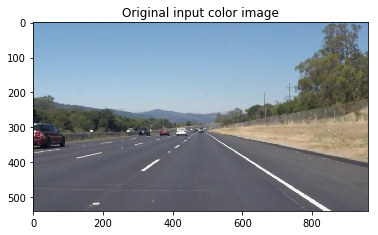

In [4]:
# input image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

# print out the stats of the image and plot it
print('This image is: ', type(image), 'with dimensions: ', image.shape)
plt.imshow(image)
plt.title('Original input color image')

## Helper Functions

In [98]:
import math

def grayscale(img):
    # convert the input image to grayscale
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def gaussianBlur(img, kernel_size):
    """apply gaussian smoothing to eliminate the random
    abnormalities in the image"""
    return cv2.GaussianBlur(img,(kernel_size, kernel_size), 0)

def cannyEdges(img, low_threshold, high_threshold):
    # apply canny transform to the gaussian image
    return cv2.Canny(img, low_threshold, high_threshold)

def regionOfInterest(img, vertices):
    # a polygon to mask the region of interest in the image
    # the ROI is retained and the rest of the image is set black
    
    # create a blank image with original image attributes
    mask = np.zeros_like(img)
    
    # define 3channel or 1channel color to fill the mask with depending
    # on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2] # 3 or 4 depending on the image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    
    # fill pixels inside the polygon defined by "vertices" with the fill color
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    # returning the image only where mask pixels are non-zero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_lines(img, lines, color=[255,0,0], thickness=2):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img,(x1,y1), (x2,y2), color, thickness)


def houghTransform(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]),\
                           minLineLength=min_line_len, maxLineGap= \
                           max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    
    return cv2.addWeighted(initial_img, α, img, β, γ)

## Grayscale of the input image

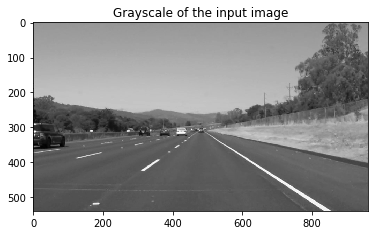

In [90]:
gray = grayscale(image)
plt.title('Grayscale of the input image')
plt.imshow(gray, cmap ='gray')

## Apply Gaussian smoothing

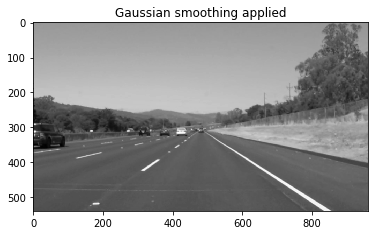

In [91]:
kernel_size = 3
gs_img = gaussianBlur(gray, kernel_size)
plt.title('Gaussian smoothing applied')
plt.imshow(gs_img, cmap='gray')

## Apply Canny Transform

(540, 960)


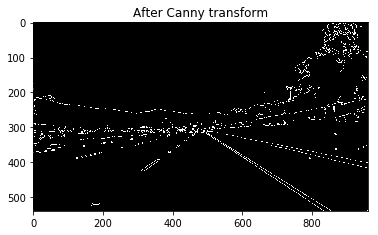

In [92]:
l_thresh = 45
h_thresh = 135
c_img = cannyEdges(gs_img, l_thresh, h_thresh)
plt.title('After Canny transform')
plt.imshow(c_img, cmap='gray')
print(c_img.shape)

## Region Of Interest

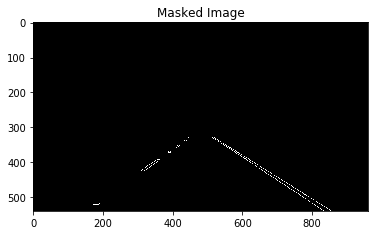

In [99]:
# define the vertices of the polygon mask
top_left = [410,330]
top_right = [550,330]
bottom_left = [150,540]
bottom_right = [900,540]
polyGon = np.array([[(top_left[0], top_left[1]),\
           (top_right[0], top_right[1]),\
           (bottom_right[0], bottom_right[1]),\
           (bottom_left[0], bottom_left[1])]], dtype=np.int32)
roi_img = regionOfInterest(c_img, polyGon)
plt.title('Masked Image')
plt.imshow(roi_img, cmap='gray')

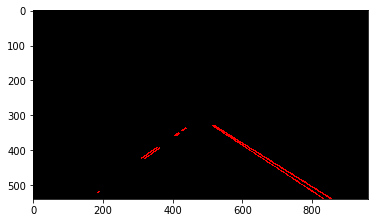

In [101]:
h_img = houghTransform(roi_img, rho=2, theta=(np.pi/180), threshold=18, min_line_len=5, max_line_gap=4)
plt.imshow(h_img)

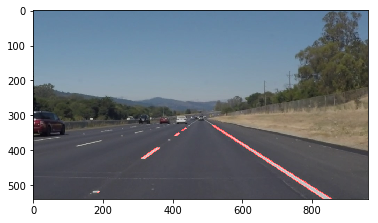

In [105]:
inter_img = weighted_img(h_img, image )
plt.imshow(inter_img)